##### DATA WARRIOR ANALYTICS

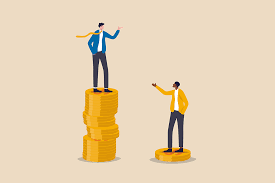

In [1]:
from PIL import Image
Image.open('income.png')

# Brief Description

The purpose of this project was to analyse global income inequality. Income inequality is a phenomenon that occurs when there is an uneven distribution of income throughout a population. According to a United Nations report in 2020 income inequality has been on the rise and has been affecting more than two-thirds of the globe. This project analysed the disparity between the top 1% and the bottom 50% of income earners and did a regression analysis to determine if a relationship exists between the dependent variable of income inequality, measured by the Gini Coefficient, and the independent variables of the unemployment rate, government spending on education (% of GDP), gender inequality, corruption and share of income.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
%matplotlib inline
sns.set()
sns.set_style('white')
plt.rcParams.update({'figure.figsize':(15,10), 'figure.dpi':100})
pd.options.display.float_format = '{:,.2f}'.format

# Importing Data, Data Cleaning and Data Exploration

### GINI Coefficient Data

In [3]:
#importing the GINI coefficient csv file
df_gini_coeff = pd.read_csv('csvData_Gini_per_country.csv')
df_gini_coeff.head()

,Country,Gini Coefficient
0,South Africa,63.00
1,Namibia,59.10
2,Suriname,57.90
3,Zambia,57.10
4,Sao Tome and Principe,56.30


WHAT IS THE GINI COEFFICIENT?

The GINI coefficient is an index that measures the distribution of income across a population. The coefficient ranges from 0 (or 0%) to 1 (or 100%), with zero representing perfect equality and one representing perfect inequality.


In [4]:
#checking on data type
print(df_gini_coeff.dtypes)

Country              object
Gini Coefficient    float64
dtype: object


In [5]:
#Checking for any missing values
df_gini_coeff.isnull().sum() #no missing values from the result

Country             0
Gini Coefficient    0
dtype: int64

###  Unemployment Data

In [6]:
#importing unemployment rate csv file
df_unemployment_rate = pd.read_csv('API_SL.UEM.TOTL.ZS_DS2_en_csv_v2_3731354_unemployment_rate.csv')
df_unemployment_rate.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,ABW,"Unemployment, total (% of total labor force) (modeled ILO estimate)",SL.UEM.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,"Unemployment, total (% of total labor force) (modeled ILO estimate)",SL.UEM.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,6.75,6.56,6.45,6.41,6.49,6.61,6.71,6.73,6.91,7.56
2,Afghanistan,AFG,"Unemployment, total (% of total labor force) (modeled ILO estimate)",SL.UEM.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,11.05,11.34,11.19,11.14,11.13,11.16,11.18,11.15,11.22,11.71
3,Africa Western and Central,AFW,"Unemployment, total (% of total labor force) (modeled ILO estimate)",SL.UEM.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,4.55,4.64,4.41,4.69,4.63,5.57,6.02,6.04,6.06,6.77
4,Angola,AGO,"Unemployment, total (% of total labor force) (modeled ILO estimate)",SL.UEM.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,7.36,7.35,7.37,7.37,7.39,7.41,7.41,7.42,7.42,8.33


In [7]:
#from the umployment data set I only need the 2020 values from the available countries
df_unemployment_rate_2 = df_unemployment_rate[['Country Name', '2020']]
df_unemployment_rate_2.head()

,Country Name,2020
0,Aruba,NaN
1,Africa Eastern and Southern,7.56
2,Afghanistan,11.71
3,Africa Western and Central,6.77
4,Angola,8.33


In [8]:
# checking for null values
df_unemployment_rate_2.isnull().sum() # there are 31 null values present in the data set

Country Name     0
2020            31
dtype: int64

In [9]:

df_unemployment_rate_cleaned = df_unemployment_rate_2.dropna().rename(columns= {'Country Name': 'Country', 
                                                                                '2020': 'Unemployment Rate'})
df_unemployment_rate_cleaned.head()

,Country,Unemployment Rate
1,Africa Eastern and Southern,7.56
2,Afghanistan,11.71
3,Africa Western and Central,6.77
4,Angola,8.33
5,Albania,13.33


In [10]:
#double checking if null values were dropped
df_unemployment_rate_cleaned.isnull().sum() #all null values dropped

#this data set is including a combination of continents and countries all continents will be dropped
# when I do an inner join with the gini dataframe

Country              0
Unemployment Rate    0
dtype: int64

### Govt Spending on Education Data

In [11]:
#importing govt spending on education csv file
df_govt_spend_on_edu = pd.read_csv('Spending on education as a percentage of GDP.csv',
                                   skiprows=4)
df_govt_spend_on_edu.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,ABW,"Government expenditure on education, total (% of GDP)",SE.XPD.TOTL.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,6.12,6.55,6.44,5.85,5.89,5.49,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,"Government expenditure on education, total (% of GDP)",SE.XPD.TOTL.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,4.39,5.51,4.62,4.92,5.08,4.88,5.02,4.95,4.72,4.72
2,Afghanistan,AFG,"Government expenditure on education, total (% of GDP)",SE.XPD.TOTL.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,3.46,NaN,3.45,3.70,3.26,3.51,3.37,3.20,3.21,3.21
3,Africa Western and Central,AFW,"Government expenditure on education, total (% of GDP)",SE.XPD.TOTL.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,2.99,3.01,3.03,3.16,3.12,2.83,3.43,3.07,3.03,3.03
4,Angola,AGO,"Government expenditure on education, total (% of GDP)",SE.XPD.TOTL.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,3.24,3.28,3.87,2.93,3.49,2.75,2.47,2.04,1.82,1.82


In [12]:
#from the data set will be taking the country name column and the 2018 colum(2020 and 2019 data is limited hence using 2018)
df_govt_spend_on_edu_2 = df_govt_spend_on_edu[['Country Name', '2018']]
df_govt_spend_on_edu_2.head()

,Country Name,2018
0,Aruba,NaN
1,Africa Eastern and Southern,4.95
2,Afghanistan,3.20
3,Africa Western and Central,3.07
4,Angola,2.04


In [13]:
#checking for null values
df_govt_spend_on_edu_2.isnull().sum() # there are 76 null values present in the data set

Country Name     0
2018            76
dtype: int64

In [14]:
#dropping records with null values and renaming the 2018 column
df_govt_spend_on_edu_cleaned = df_govt_spend_on_edu_2.dropna().rename(columns= {'Country Name': 'Country', 
                                                                                '2018': 'Govt Spend on Education (% of GDP)'})
df_govt_spend_on_edu_cleaned.head()

#same thing with the umemployment data set contients and countries are mixed together, and continents will be removed when 
# I do an inner join

,Country,Govt Spend on Education (% of GDP)
1,Africa Eastern and Southern,4.95
2,Afghanistan,3.20
3,Africa Western and Central,3.07
4,Angola,2.04
6,Andorra,3.25


### Share of Income Data

In [15]:
# importing bottom 50% share of income csv file
df_bottom_50per_share_income_country = pd.read_csv('Bottom 50 percent share of income.csv', 
                                                   encoding='latin1')
df_bottom_50per_share_income_country.head()

,Country,Bottom 50% share of income
0,South Africa,0.05
1,Namibia,0.07
2,Zambia,0.07
3,Central African Republic,0.08
4,Swaziland,0.08


In [16]:
#checking for null values
df_bottom_50per_share_income_country.isnull().sum()  #no null values

Country                       0
Bottom 50% share of income    0
dtype: int64

### Corruption Perception Index Data

In [17]:
#Importing corruption perception index csv file
df_cpi_per_country = pd.read_csv('CPI per Country 2020.csv', 
                                 encoding='latin1')
df_cpi_per_country.head()

,Country,CPI Score,CPI Rank
0,Denmark,88,1
1,New Zealand,88,1
2,Finland,85,3
3,Singapore,85,3
4,Sweden,85,3


In [18]:
#checking for null values
df_cpi_per_country.isnull().sum() #no missing values

Country      0
CPI Score    0
CPI Rank     0
dtype: int64

WHAT IS CORRUPTION PERCEPTION INDEX (CPI)

Is an index which ranks countries by their perceived levels of public sector corruption. 

Scores range from 0 to 100, with zero indicating high levels of corruption and 100 indicating low levels. 

The CPI is published annually by Transparency International, an organization that seeks to stop bribery, fraud, and other forms of public sector corruption.

In [19]:
#importing top 1% share of income by country 
df_top_1per_share_income_country = pd.read_csv('Top 1% share of income.csv', 
                                               encoding='latin1')
df_top_1per_share_income_country.head()

,Country,Top 1% share of income
0,Switzerland,0.11
1,Uruguay,0.15
2,Syrian Arab Republic,0.21
3,Guinea,0.13
4,Malawi,0.28


In [20]:
#checking for null values 
df_top_1per_share_income_country.isnull().sum() # no null values

Country                   0
Top 1% share of income    0
dtype: int64

In [21]:
#importing bottom 50% of income share per region
df_bottom_50per_share_income_region = pd.read_csv('Region bottom 50% share of income.csv')
df_bottom_50per_share_income_region

,Region,Bottom 50% share of income
0,Africa,0.09
1,Asia,0.10
2,Latin America,0.10
3,Europe,0.19
4,Oceania,0.12
5,North America,0.13
6,Middle East,0.09


In [22]:
#importing top 1% of income share per region
df_top_1per_share_income_region = pd.read_csv('Region top 1% share of income.csv')
df_top_1per_share_income_region

,Region,Top 1% share of income
0,Africa,0.20
1,Asia,0.19
2,Latin America,0.24
3,Europe,0.12
4,Oceania,0.14
5,North America,0.19
6,Middle East,0.23


### Gender Gap Index Data

In [23]:
#Importing the gender gap index csv file
df_gender_gap_index = pd.read_csv('Gender Gap index 2020.csv',
                                  encoding='latin1')
df_gender_gap_index.head()

,Gender Gap Rank,Country,Gender Gap Score (0-1)
0,1,Iceland,0.88
1,2,Norway,0.84
2,3,Finland,0.83
3,4,Sweden,0.82
4,5,Nicaragua,0.80


In [24]:
#checking on data types
df_gender_gap_index.dtypes

Gender Gap Rank             int64
Country                    object
Gender Gap Score (0-1)    float64
dtype: object

In [25]:
#checkeing for null values 
df_gender_gap_index.isnull().sum() # no null values

Gender Gap Rank           0
Country                   0
Gender Gap Score (0-1)    0
dtype: int64

In [26]:
#rearranging columns
df_gender_gap_index = df_gender_gap_index[['Country', 'Gender Gap Score (0-1)', 'Gender Gap Rank']]
df_gender_gap_index.head()

,Country,Gender Gap Score (0-1),Gender Gap Rank
0,Iceland,0.88,1
1,Norway,0.84,2
2,Finland,0.83,3
3,Sweden,0.82,4
4,Nicaragua,0.80,5


WHAT IS THE GENDER GAP INDEX

The index quantifies the gaps between women and men in four key areas of health, education, economy, and politics.

Countries are given a score from 0-1. A score of 1 indicates full equality between women and men and a score of 0 indicates full inequality.

In [27]:
#joining the dataframes of bottom 50% and top 1% share of income, gender gap index, CPI, unemlpoyment and education spend as 1 dataframe
df_main = pd.merge(left = df_gini_coeff, 
                   right = df_bottom_50per_share_income_country, 
                   left_on = 'Country', 
                   right_on = 'Country')

df_main_2 =pd.merge(left = df_main,
                   right = df_top_1per_share_income_country,
                   left_on = 'Country',
                   right_on = 'Country')

df_main_3 = pd.merge(left = df_main_2,
                    right = df_gender_gap_index,
                    left_on = 'Country',
                    right_on = 'Country')

df_main_4 = pd.merge(left = df_main_3,
                    right = df_cpi_per_country,
                    left_on = 'Country',
                    right_on = 'Country')

df_main_5 = pd.merge(left = df_main_4,
                    right = df_unemployment_rate_cleaned,
                    left_on = 'Country',
                    right_on = 'Country')

df_main_final = pd.merge(left = df_main_5,
                        right = df_govt_spend_on_edu_cleaned,
                        left_on = 'Country',
                        right_on = 'Country')

In [28]:
df_main_final.head()

,Country,Gini Coefficient,Bottom 50% share of income,Top 1% share of income,Gender Gap Score (0-1),Gender Gap Rank,CPI Score,CPI Rank,Unemployment Rate,Govt Spend on Education (% of GDP)
0,South Africa,63.00,0.05,0.22,0.78,17,44,69,29.22,6.16
1,Namibia,59.10,0.07,0.22,0.78,12,51,57,21.45,8.99
2,Suriname,57.90,0.13,0.20,0.71,77,38,94,9.78,5.69
3,Zambia,57.10,0.07,0.23,0.73,45,33,117,12.85,4.74
4,Mozambique,54.00,0.08,0.31,0.72,56,25,149,3.81,5.45


In [29]:
#checking for any missing/null values
df_main_final.isnull().sum() #no missing/null values

Country                               0
Gini Coefficient                      0
Bottom 50% share of income            0
Top 1% share of income                0
Gender Gap Score (0-1)                0
Gender Gap Rank                       0
CPI Score                             0
CPI Rank                              0
Unemployment Rate                     0
Govt Spend on Education (% of GDP)    0
dtype: int64

# Summary Statistics

In [30]:
#Summary Statistics
print(df_gini_coeff.describe())
print('_______________________________')
print(df_bottom_50per_share_income_country.describe())
print('_______________________________')
print(df_bottom_50per_share_income_region.describe())
print('_______________________________')
print(df_top_1per_share_income_country.describe())
print('_______________________________')
print(df_top_1per_share_income_region.describe())
print('_______________________________')
print(df_gender_gap_index.describe())
print('_______________________________')
print(df_cpi_per_country.describe())
print('_______________________________')
print(df_unemployment_rate_cleaned.describe())
print('_______________________________')
print(df_govt_spend_on_edu_cleaned.describe())

       Gini Coefficient
count            163.00
mean              38.20
std                7.83
min               24.60
25%               32.80
50%               36.80
75%               42.45
max               63.00
_______________________________
       Bottom 50% share of income
count                      179.00
mean                         0.15
std                          0.04
min                          0.05
25%                          0.12
50%                          0.15
75%                          0.18
max                          0.25
_______________________________
       Bottom 50% share of income
count                        7.00
mean                         0.12
std                          0.04
min                          0.09
25%                          0.09
50%                          0.10
75%                          0.13
max                          0.19
_______________________________
       Top 1% share of income
count                  177.00
mean            

# EDA and visualisations

Text(0.5, 0.98, 'Bottom 50% and Top 1% Share of Income by Region 2020')

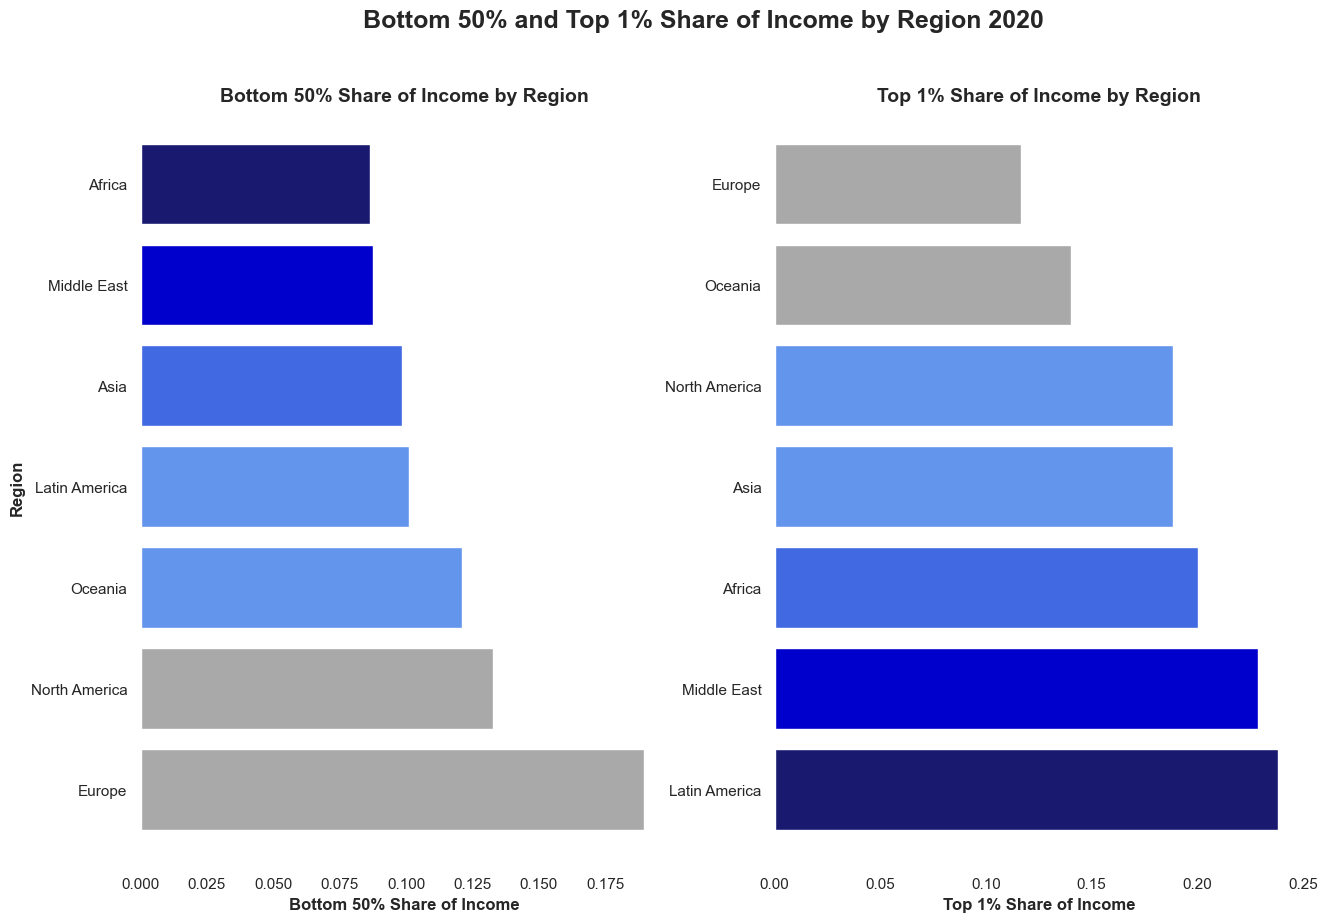

In [31]:
#Visualising the Countients Income gaps using Bar Chart
fig = plt.figure()
 
df_bottom_50per_share_income_region.sort_values(by = 'Bottom 50% share of income', 
                                                ascending = False, 
                                                inplace = True)

ax1 = plt.subplot(121)

ax1.barh(df_bottom_50per_share_income_region['Region'], 
        df_bottom_50per_share_income_region['Bottom 50% share of income'], 
         color =[ 'darkgrey',
                 'darkgrey', 
                 'cornflowerblue',
                 'cornflowerblue', 
                 'royalblue', 
                 'mediumblue', 
                 'midnightblue'])

ax1.set_xlabel('Bottom 50% Share of Income', 
               fontsize = 12, 
               fontweight = 'bold')

ax1.set_ylabel('Region', 
               fontsize = 12, 
               fontweight = 'bold')

ax1.set_title('Bottom 50% Share of Income by Region', 
              fontsize = 14, 
              fontweight = 'bold')

ax1.set_frame_on(False)

df_top_1per_share_income_region.sort_values(by = 'Top 1% share of income', 
                                            ascending=False, 
                                            inplace=True)

ax2 = plt.subplot(122)
ax2.barh(df_top_1per_share_income_region['Region'], 
        df_top_1per_share_income_region['Top 1% share of income'], 
         color = ['midnightblue', 
                 'mediumblue', 
                 'royalblue', 
                 'cornflowerblue',
                 'cornflowerblue', 
                 'darkgrey',
                 'darkgrey', 
                 'darkgrey', 
                 'gainsboro', 
                 'gainsboro'])

ax2.set_xlabel('Top 1% Share of Income', 
               fontsize = 12, 
               fontweight = 'bold')

ax2.set_title('Top 1% Share of Income by Region', 
              fontsize = 14, 
              fontweight = 'bold')

ax2.set_frame_on(False)

plt.suptitle('Bottom 50% and Top 1% Share of Income by Region 2020', 
             fontsize = 18,
             fontweight = 'bold')


Text(0.5, 0.98, 'Countries GINI Coefficient 2020')

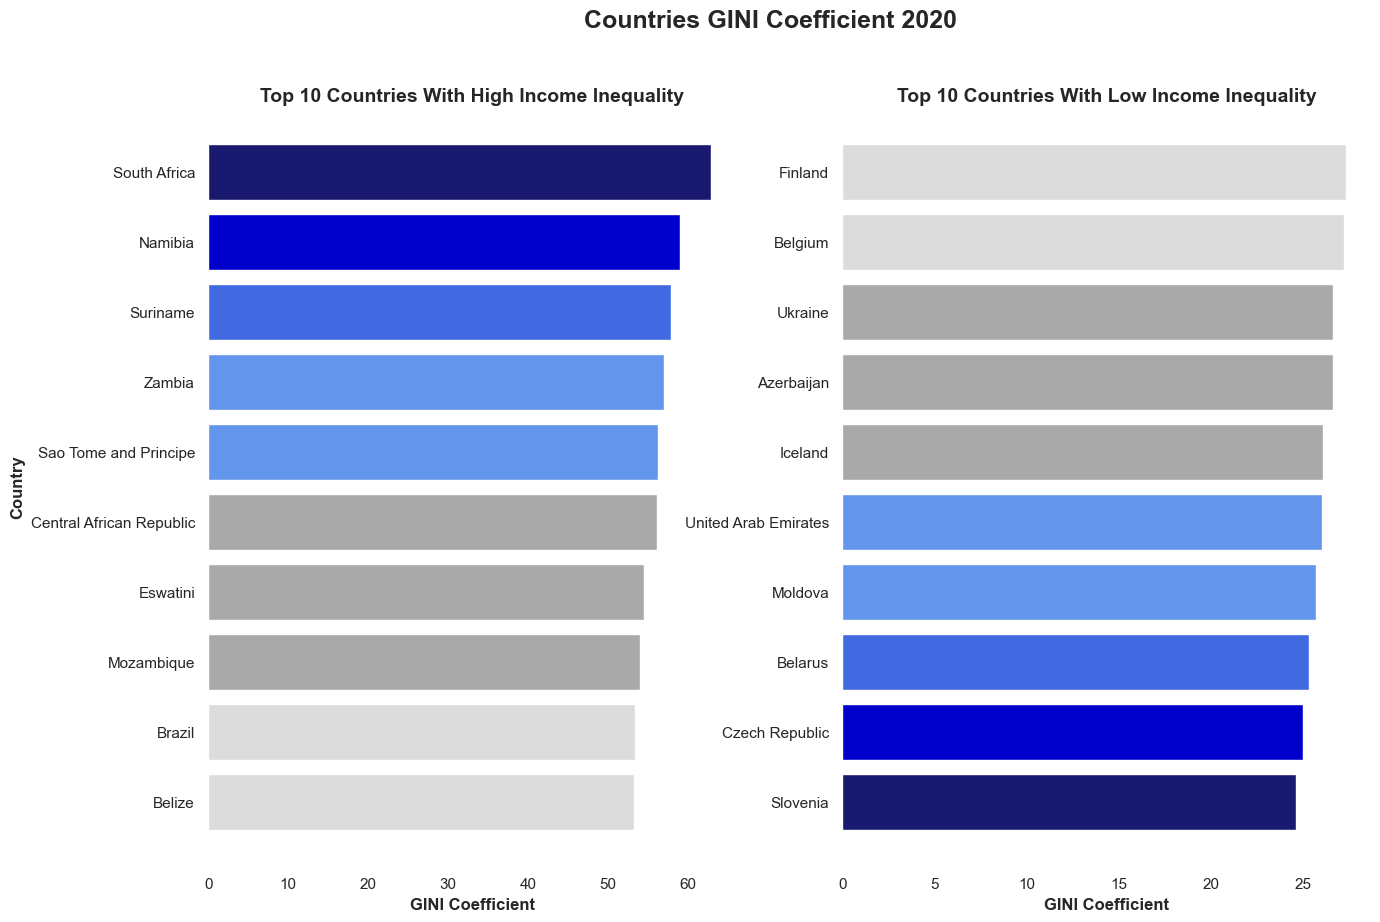

In [32]:
#Visualing the top 10 most unequal countries in the world
df_gini_coeff_sorted_10_worst = df_gini_coeff.sort_values(by = 'Gini Coefficient', 
                                                          ascending=True).iloc[-10:]

df_gini_coeff_sorted_10_best = df_gini_coeff.sort_values(by = 'Gini Coefficient', 
                                                         ascending=True).iloc[:10]

fig = plt.figure()
 
ax1 = plt.subplot(121)

ax1.barh(df_gini_coeff_sorted_10_worst['Country'], 
        df_gini_coeff_sorted_10_worst['Gini Coefficient'], 
         color =['gainsboro', 
                 'gainsboro', 
                 'darkgrey', 
                 'darkgrey',
                 'darkgrey', 
                 'cornflowerblue',
                 'cornflowerblue', 
                 'royalblue', 
                 'mediumblue', 
                 'midnightblue'])

ax1.set_xlabel('GINI Coefficient', 
               fontsize = 12, 
               fontweight = 'bold')

ax1.set_ylabel('Country', 
               fontsize = 12, 
               fontweight = 'bold')

ax1.set_title('Top 10 Countries With High Income Inequality',
              fontsize = 14, 
              fontweight = 'bold')

ax1.set_frame_on(False)

ax2 = plt.subplot(122)

ax2.barh(df_gini_coeff_sorted_10_best['Country'], 
        df_gini_coeff_sorted_10_best['Gini Coefficient'], 
         color = ['midnightblue', 
                 'mediumblue', 
                 'royalblue', 
                 'cornflowerblue',
                 'cornflowerblue', 
                 'darkgrey',
                 'darkgrey', 
                 'darkgrey', 
                 'gainsboro', 
                 'gainsboro'])

ax2.set_title('Top 10 Countries With Low Income Inequality',
              fontsize = 14, 
              fontweight = 'bold')

ax2.set_xlabel('GINI Coefficient', 
               fontsize = 12, 
               fontweight = 'bold')

ax2.set_frame_on(False)

plt.suptitle('Countries GINI Coefficient 2020', 
             fontsize = 18, 
             fontweight = 'bold')

The ten most unequal countries lie in Africa with the first eight making the top ten and the leading country being South Africa. Two South American countries of Brazil and Belize make up the rest of the top ten.


Juxtaposed to the highly unequal countries are European countries that dominate the top ten countries with low-income inequality, with Slovenia having the lowest inequality at 24.60%.



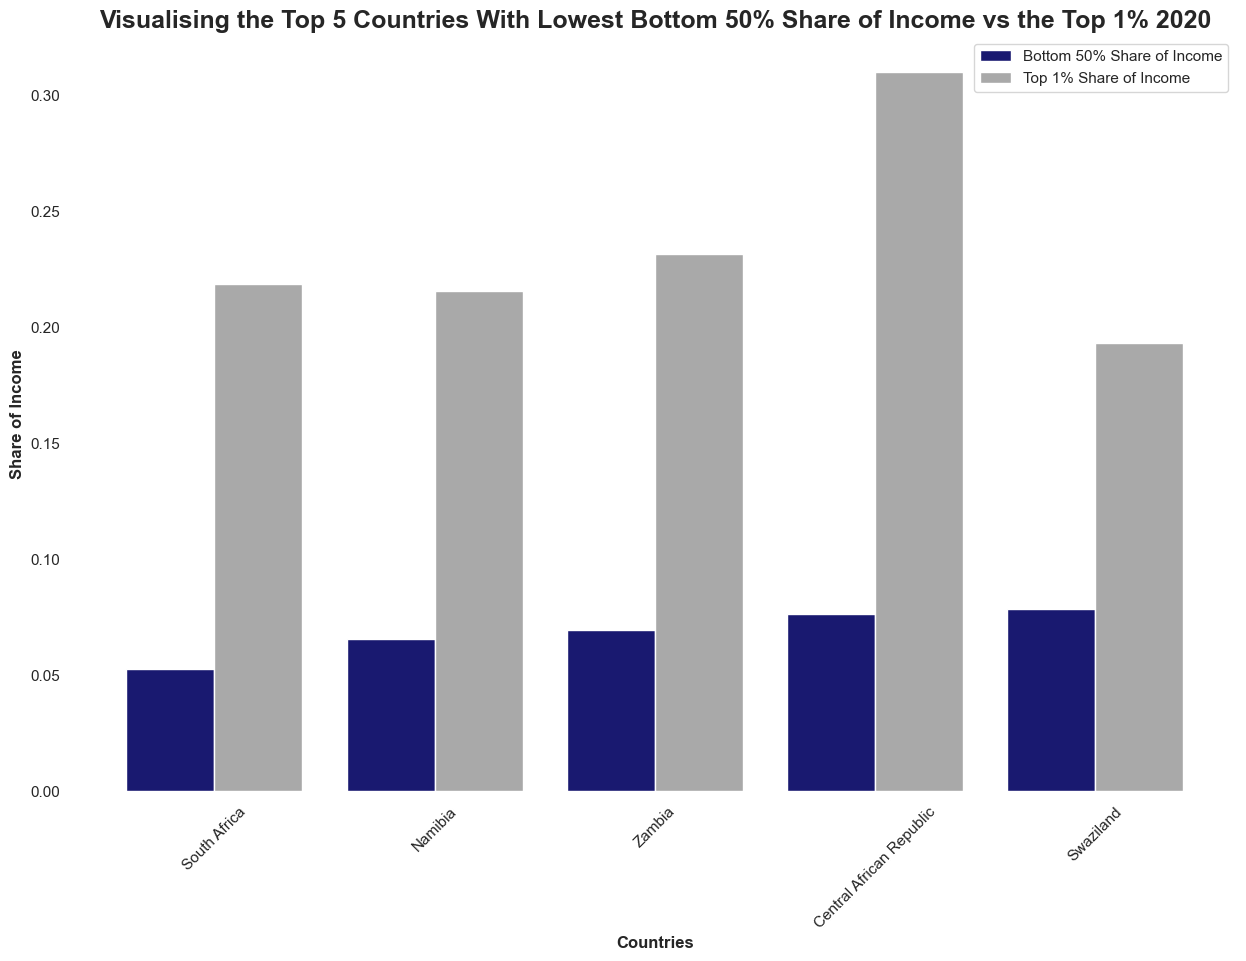

In [33]:
#Visualising the bottom 50% vs the top 1% share of income using Bar Chart
df_bottom_50_vs_top_1 = pd.merge(left = df_bottom_50per_share_income_country,
                                right = df_top_1per_share_income_country,
                                left_on = 'Country',
                                right_on = 'Country')

df_bottom_50_vs_top_1 = df_bottom_50_vs_top_1.sort_values(by = 'Bottom 50% share of income', 
                                                          ascending=True).iloc[:5]

ax = plt.gca()

Country = list(df_bottom_50_vs_top_1['Country'])
bottom_50 = list(df_bottom_50_vs_top_1['Bottom 50% share of income'])
top_1 = list(df_bottom_50_vs_top_1['Top 1% share of income'])

x_axis = np.arange(len(Country))
    
plt.bar(x_axis -0.2,
        bottom_50, 
        label = 'Bottom 50% Share of Income',
        color = 'midnightblue', 
        width=0.4)

plt.bar(x_axis +0.2,
        top_1, 
        label = 'Top 1% Share of Income',
        color = 'darkgrey',
        width=0.4)

plt.ylabel('Share of Income', 
           fontweight = 'bold')

plt.xlabel('Countries', 
           fontweight = 'bold')

plt.xticks(x_axis, Country)

plt.xticks(rotation = 45)

plt.title('Visualising the Top 5 Countries With Lowest Bottom 50% Share of Income vs the Top 1% 2020', 
          fontsize = 18, 
          fontweight = 'bold')

plt.legend()

ax.set_frame_on(False)

plt.show()

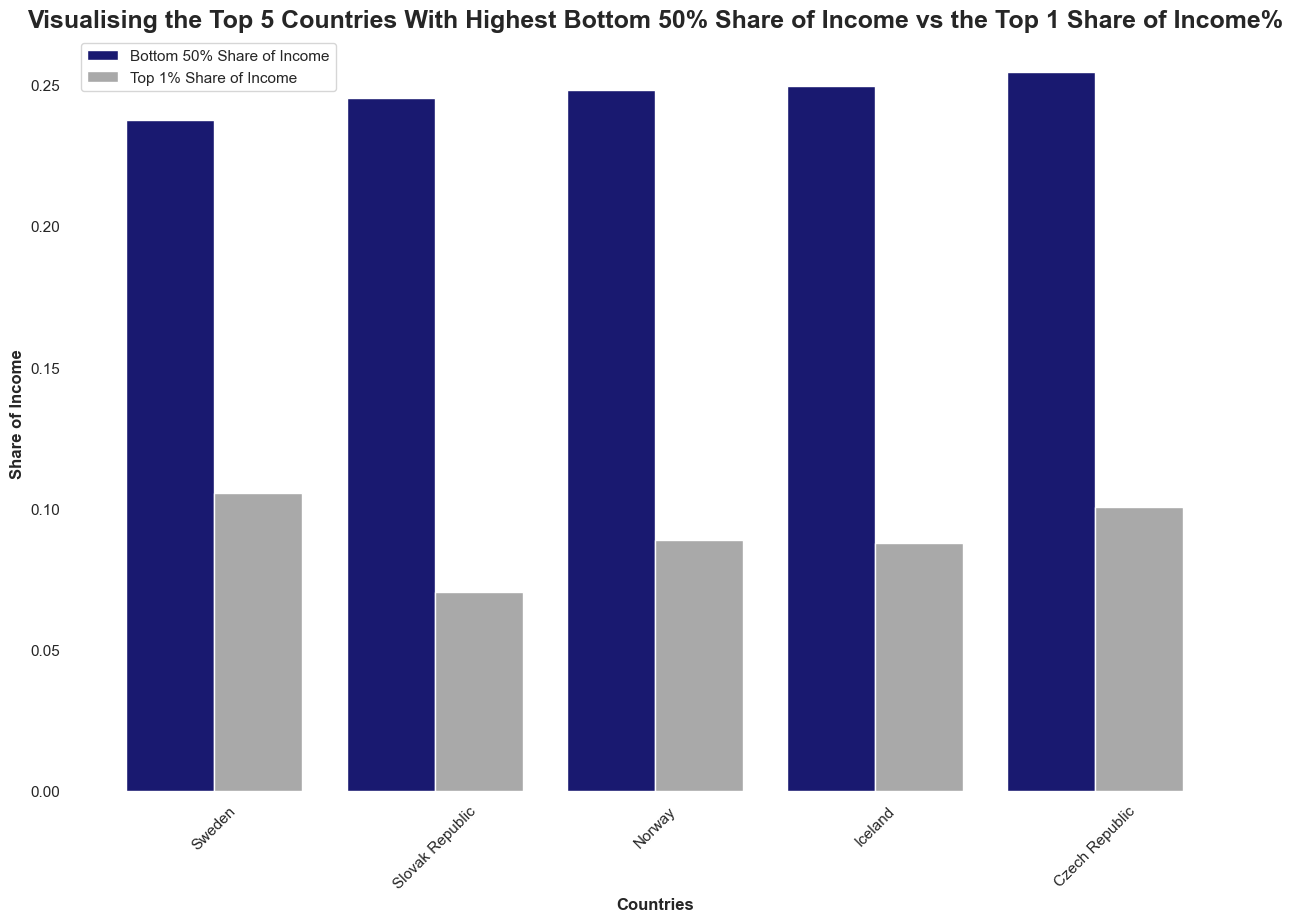

In [34]:
df_bottom_50_vs_top_1 = pd.merge(left = df_bottom_50per_share_income_country,
                                right = df_top_1per_share_income_country,
                                left_on = 'Country',
                                right_on = 'Country')

df_bottom_50_vs_top_1_2 = df_bottom_50_vs_top_1.sort_values(by = 'Bottom 50% share of income', 
                                                            ascending=True).iloc[-5:]

Country = list(df_bottom_50_vs_top_1_2['Country'])
bottom_50_2 = list(df_bottom_50_vs_top_1_2['Bottom 50% share of income'])
top_1_2 = list(df_bottom_50_vs_top_1_2['Top 1% share of income'])

ax = plt.gca()

x_axis = np.arange(len(Country))
    
plt.bar(x_axis -0.2,
        bottom_50_2, 
        label = 'Bottom 50% Share of Income',
        color = 'midnightblue', 
        width=0.4)

plt.bar(x_axis +0.2,
        top_1_2, 
        label = 'Top 1% Share of Income',
        color = 'darkgrey',
        width=0.4)

plt.ylabel('Share of Income', 
           fontweight = 'bold')

plt.xlabel('Countries', fontweight = 'bold')

plt.xticks(x_axis, Country)

plt.xticks(rotation = 45)

plt.title('Visualising the Top 5 Countries With Highest Bottom 50% Share of Income vs the Top 1 Share of Income%', 
          fontsize = 18, 
          fontweight = 'bold')

plt.legend()

ax.set_frame_on(False)

plt.show()

In European countries their societies seem to be more egalitarian as there is not a big gap between the top 1% as compared to the bottom 50%.

Text(0.5, 0.98, 'Countries Gender Gap Index 2020')

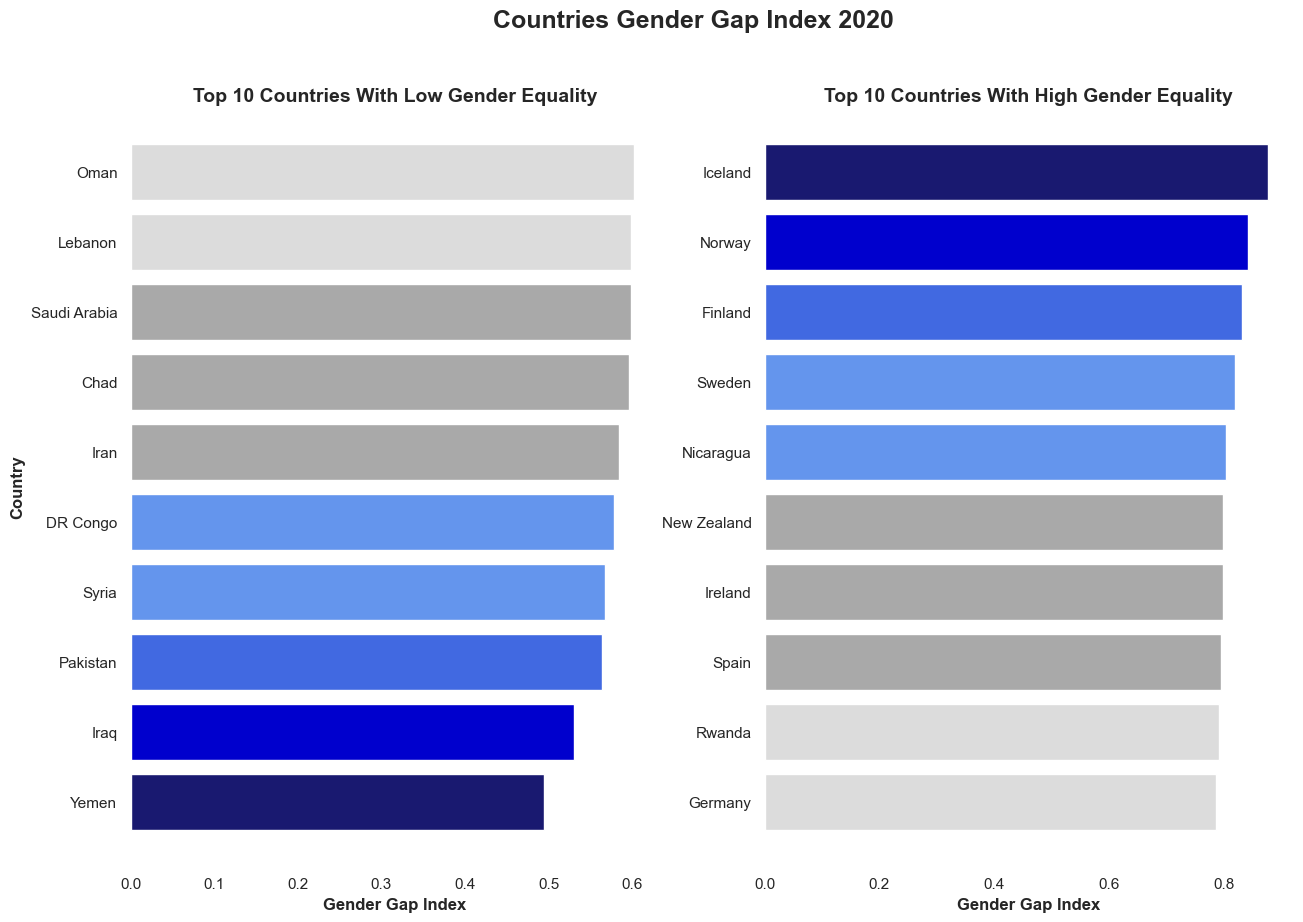

In [35]:
# Visualising Gender per country
df_gender_gap_index_worst = df_gender_gap_index.sort_values(by = 'Gender Gap Score (0-1)',
                                                            ascending=True).iloc[:10]

df_gender_gap_index_best = df_gender_gap_index.sort_values(by = 'Gender Gap Score (0-1)', 
                                                           ascending=True).iloc[-10:]


fig = plt.figure()
 
ax1 = plt.subplot(121)

ax1.barh(df_gender_gap_index_worst['Country'], 
        df_gender_gap_index_worst['Gender Gap Score (0-1)'], 
         color =['midnightblue',
                 'mediumblue',
                 'royalblue',
                 'cornflowerblue',
                 'cornflowerblue',
                 'darkgrey',
                 'darkgrey',
                 'darkgrey',
                 'gainsboro',
                 'gainsboro'])

ax1.set_xlabel('Gender Gap Index', 
               fontsize = 12, 
               fontweight = 'bold')

ax1.set_ylabel('Country', 
               fontsize = 12, 
               fontweight = 'bold')

ax1.set_title('Top 10 Countries With Low Gender Equality', 
              fontsize = 14, 
              fontweight = 'bold')

ax1.set_frame_on(False)

ax2 = plt.subplot(122)

ax2.barh(df_gender_gap_index_best['Country'], 
        df_gender_gap_index_best['Gender Gap Score (0-1)'], 
         color = ['gainsboro',
                  'gainsboro',
                  'darkgrey',
                  'darkgrey',
                  'darkgrey',
                  'cornflowerblue',
                  'cornflowerblue',
                  'royalblue',
                  'mediumblue',
                  'midnightblue'])

ax2.set_title('Top 10 Countries With High Gender Equality', 
              fontsize = 14, 
              fontweight = 'bold')

ax2.set_xlabel('Gender Gap Index', 
               fontsize = 12, 
               fontweight = 'bold')

ax2.set_frame_on(False)

plt.suptitle('Countries Gender Gap Index 2020', 
             fontsize = 18, 
             fontweight = 'bold')


The Gender Gap Index quantifies the gaps between women and men in four key areas: health, education, economy, and politics.
The scores range from zero to one. A score of one indicates full equality between women and men and a score of zero indicates full inequality.

The countries with low gender equality seem to be Muslim nations such as Yemen and Iraq.

European Countries once again top the list of countries that are gender equal, with Iceland being the highest gender equal nation. Rwanda is the only African country in the top ten just slightly ahead of Germany.


Text(0.5, 0.98, 'Countries Unemployment Rates 2020')

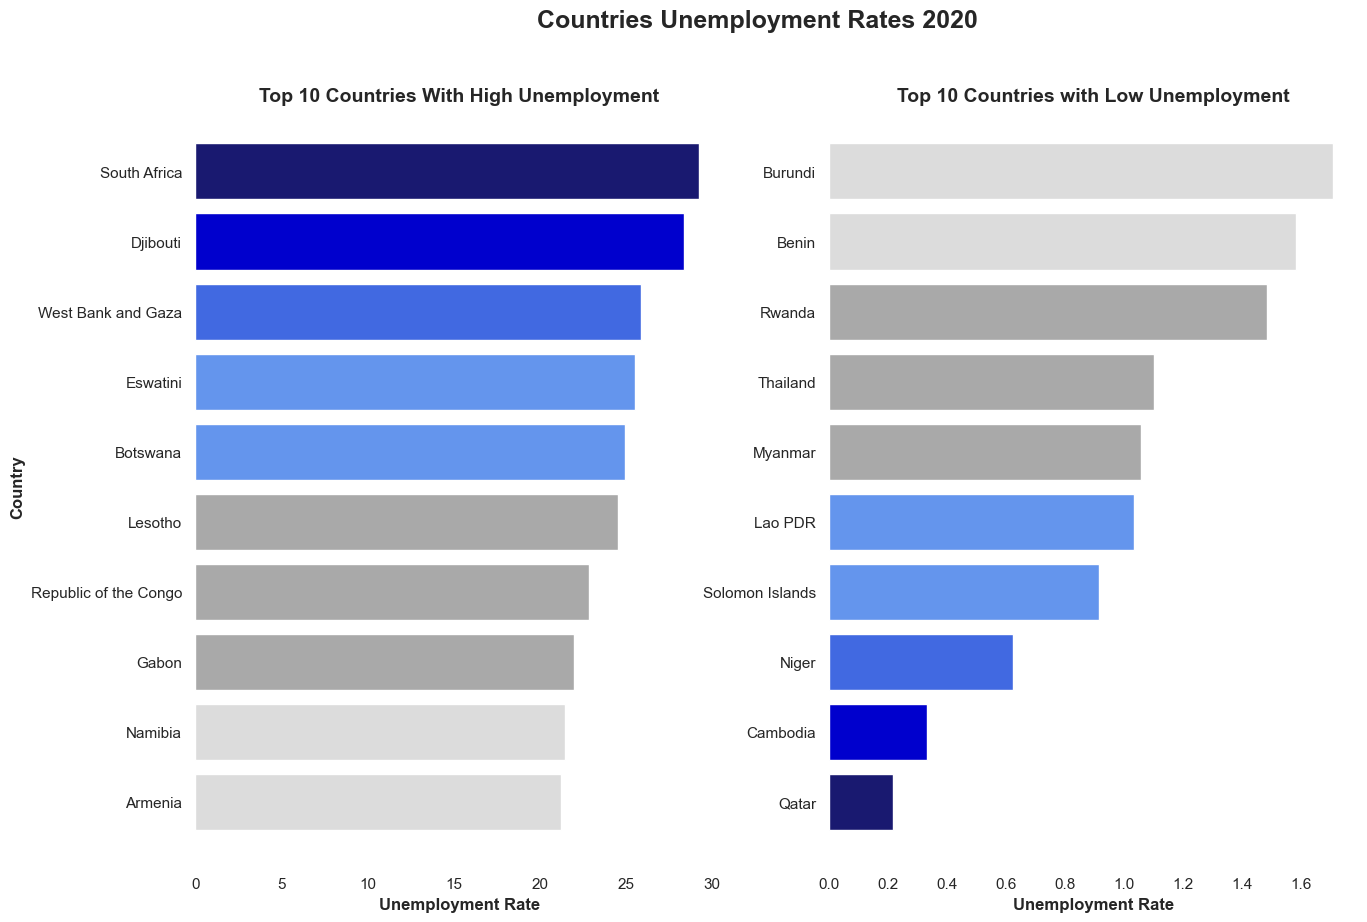

In [36]:
#Visualising Unemployment rate using Bar Chart

df_unemployment_rate_cleaned_worst = df_unemployment_rate_cleaned.sort_values(by = 'Unemployment Rate', 
                                                                              ascending=True).iloc[-10:]

df_unemployment_rate_cleaned_best = df_unemployment_rate_cleaned.sort_values(by = 'Unemployment Rate', 
                                                                             ascending=True).iloc[:10]


fig = plt.figure()
 
ax1 = plt.subplot(121)

ax1.barh(df_unemployment_rate_cleaned_worst['Country'], 
        df_unemployment_rate_cleaned_worst['Unemployment Rate'], 
         color =['gainsboro',
                 'gainsboro',
                 'darkgrey',
                 'darkgrey',
                 'darkgrey',
                 'cornflowerblue',
                 'cornflowerblue',
                 'royalblue',
                 'mediumblue',
                 'midnightblue'])

ax1.set_xlabel('Unemployment Rate', 
               fontsize = 12, 
               fontweight = 'bold')

ax1.set_ylabel('Country', 
               fontsize = 12, 
               fontweight = 'bold')

ax1.set_title('Top 10 Countries With High Unemployment',
              fontsize = 14, 
              fontweight = 'bold')

ax1.set_frame_on(False)

ax2 = plt.subplot(122)

ax2.barh(df_unemployment_rate_cleaned_best['Country'], 
        df_unemployment_rate_cleaned_best['Unemployment Rate'], 
         color = ['midnightblue',
                  'mediumblue',
                  'royalblue',
                  'cornflowerblue',
                  'cornflowerblue',
                  'darkgrey',
                  'darkgrey',
                  'darkgrey',
                  'gainsboro',
                  'gainsboro'])

ax2.set_title('Top 10 Countries with Low Unemployment', 
              fontsize = 14, 
              fontweight = 'bold')

ax2.set_xlabel('Unemployment Rate', 
               fontsize = 12, 
               fontweight = 'bold')

ax2.set_frame_on(False)

plt.suptitle('Countries Unemployment Rates 2020', 
             fontsize = 18, 
             fontweight = 'bold')


South Africa has the highest Gini Coefficient and has the highest unemployment in the world as of 2020 it stood at 29.22%.

Qatar has one of the lowest unemployment rates in the world as of 2020 it was 0.21%.


Text(0.5, 0.98, 'Countries Government Spend on Education 2018')

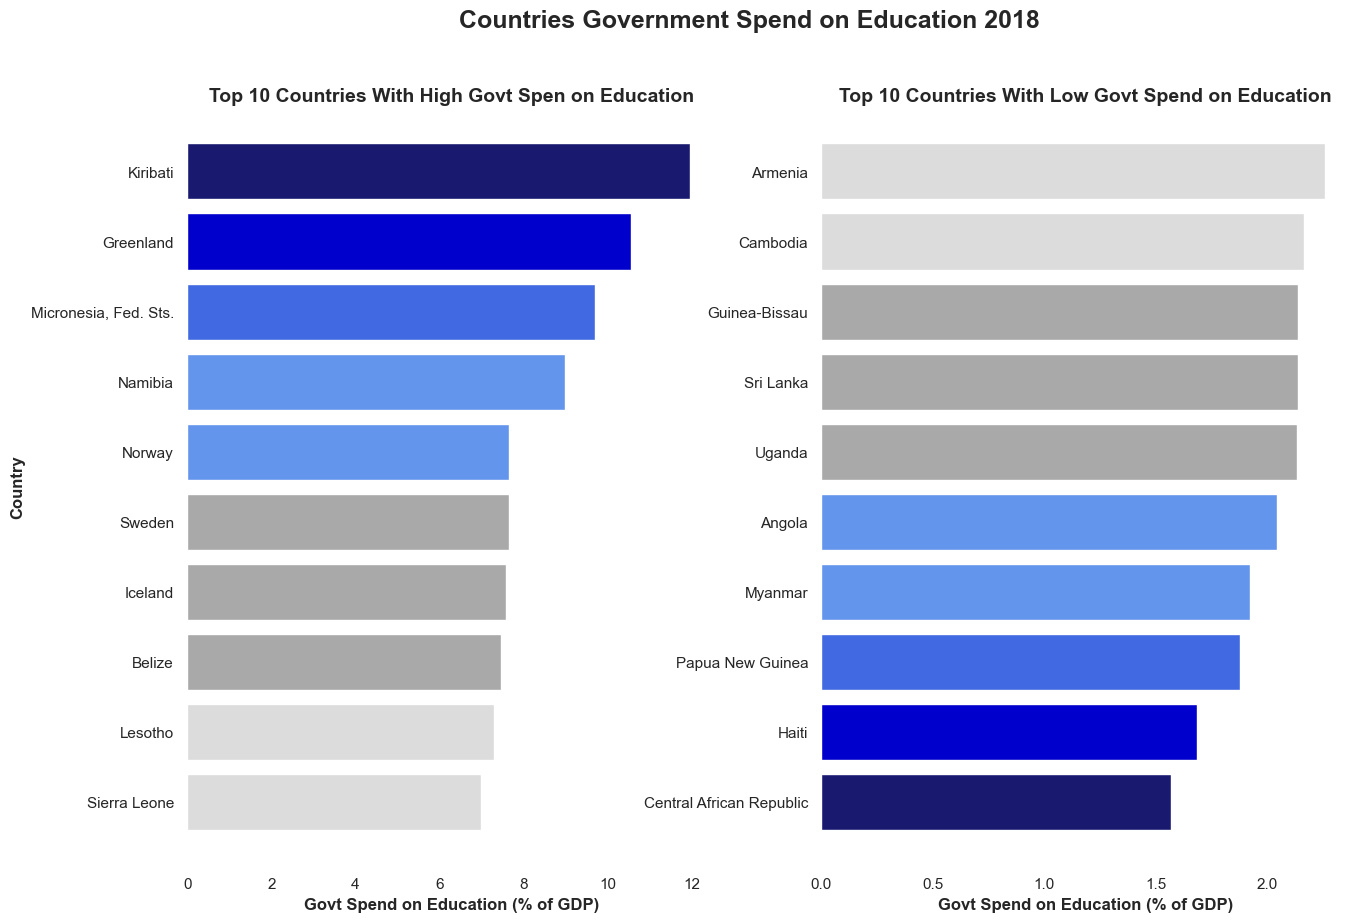

In [37]:
#Govt spend on education as a percwntage of GDP
df_govt_spend_on_edu_cleaned_worst = df_govt_spend_on_edu_cleaned.sort_values(by = 'Govt Spend on Education (% of GDP)', 
                                                                              ascending=True).iloc[-10:]

df_govt_spend_on_edu_cleaned_best = df_govt_spend_on_edu_cleaned.sort_values(by = 'Govt Spend on Education (% of GDP)', 
                                                                             ascending=True).iloc[:10]


fig = plt.figure()
 
ax1 = plt.subplot(121)

ax1.barh(df_govt_spend_on_edu_cleaned_worst['Country'], 
         df_govt_spend_on_edu_cleaned_worst['Govt Spend on Education (% of GDP)'], 
         color =['gainsboro',
                 'gainsboro',
                 'darkgrey',
                 'darkgrey',
                 'darkgrey',
                 'cornflowerblue',
                 'cornflowerblue',
                 'royalblue',
                 'mediumblue',
                 'midnightblue'])

ax1.set_xlabel('Govt Spend on Education (% of GDP)', 
               fontsize = 12, fontweight = 'bold')
ax1.set_ylabel('Country', fontsize = 12, 
               fontweight = 'bold')
ax1.set_title('Top 10 Countries With High Govt Spen on Education', 
              fontsize = 14, 
              fontweight = 'bold')

ax1.set_frame_on(False)

ax2 = plt.subplot(122)

ax2.barh(df_govt_spend_on_edu_cleaned_best['Country'], 
        df_govt_spend_on_edu_cleaned_best['Govt Spend on Education (% of GDP)'], 
         color = ['midnightblue',
                  'mediumblue',
                  'royalblue',
                  'cornflowerblue',
                  'cornflowerblue',
                  'darkgrey',
                  'darkgrey',
                  'darkgrey',
                  'gainsboro',
                  'gainsboro'])

ax2.set_title('Top 10 Countries With Low Govt Spend on Education', 
              fontsize = 14, 
              fontweight = 'bold')
ax2.set_xlabel('Govt Spend on Education (% of GDP)', 
               fontsize = 12, 
               fontweight = 'bold')

ax2.set_frame_on(False)

plt.suptitle('Countries Government Spend on Education 2018', 
             fontsize = 18, 
             fontweight = 'bold')


When it comes to public spending on education the top ten list of countries is diverse as there are African, European and Oceania Nations in the list. With Kiribati, a country in Oceania topping the list.

The Central African Republic spends the least relative to the country's GDP.



Text(0.5, 0.98, 'Countries With the High and Lowest Levels of Corruption')

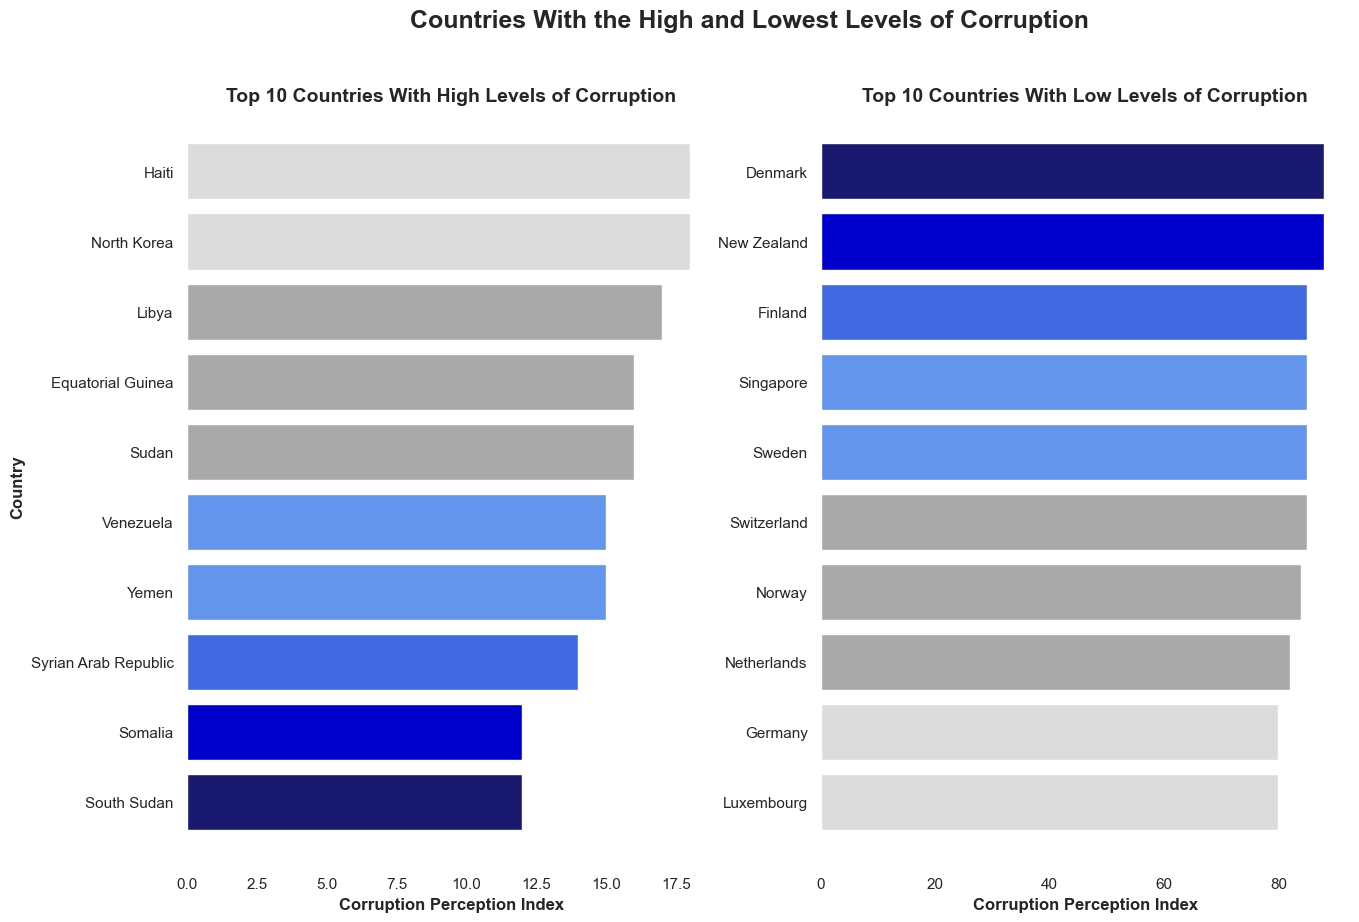

In [38]:
#Visualising Corruption Perception Index
df_cpi_per_country_worst = df_cpi_per_country.sort_values(by = 'CPI Score', 
                                                          ascending=True).iloc[:10]

df_cpi_per_country_best = df_cpi_per_country.sort_values(by = 'CPI Score', 
                                                         ascending=True).iloc[-10:]


fig = plt.figure()
 
ax1 = plt.subplot(121)

ax1.barh(df_cpi_per_country_worst['Country'], 
         df_cpi_per_country_worst['CPI Score'], 
         color =['midnightblue',
                  'mediumblue',
                  'royalblue',
                  'cornflowerblue',
                  'cornflowerblue',
                  'darkgrey',
                  'darkgrey',
                  'darkgrey',
                  'gainsboro',
                  'gainsboro'])

ax1.set_xlabel('Corruption Perception Index', 
               fontsize = 12, fontweight = 'bold')
ax1.set_ylabel('Country', fontsize = 12, 
               fontweight = 'bold')
ax1.set_title('Top 10 Countries With High Levels of Corruption', 
              fontsize = 14, 
              fontweight = 'bold')

ax1.set_frame_on(False)

ax2 = plt.subplot(122)

ax2.barh(df_cpi_per_country_best['Country'], 
        df_cpi_per_country_best['CPI Score'], 
         color = ['gainsboro',
                 'gainsboro',
                 'darkgrey',
                 'darkgrey',
                 'darkgrey',
                 'cornflowerblue',
                 'cornflowerblue',
                 'royalblue',
                 'mediumblue',
                 'midnightblue'])

ax2.set_title('Top 10 Countries With Low Levels of Corruption', 
              fontsize = 14, 
              fontweight = 'bold')

ax2.set_xlabel('Corruption Perception Index', 
               fontsize = 12, 
               fontweight = 'bold')

ax2.set_frame_on(False)

plt.suptitle('Countries With the High and Lowest Levels of Corruption',
             fontsize = 18, 
             fontweight = 'bold')


The Lower the CPI the more corrupt a nation is. From the chart, South Sudan is the most corrupt country in the top ten.

European countries make the top ten as the least corrupt nations in the world, with Denmark being the least corrupt country in 2020.


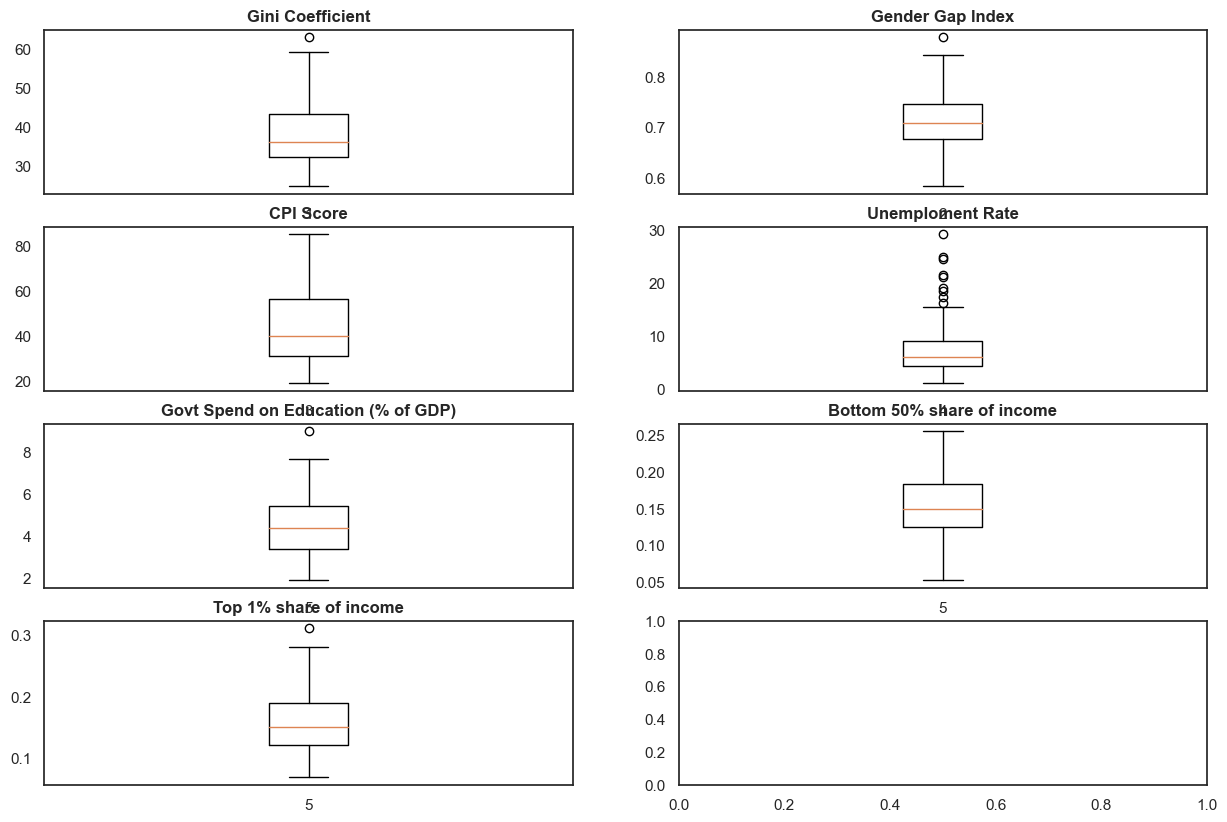

In [39]:
#creating function for box plot
def boxplot_chart(gini, gender,cpi, unemployment, govt_spend, bottom_50, top_1,data):
    fig, axs = plt.subplots(4,2)

    axs[0,0].boxplot(gini, 
                     labels = '1',
                     data = data)
    axs[0,0].set_title('Gini Coefficient',
                       fontsize = 12, 
                       fontweight = 'bold')

    axs[0,1].boxplot(gender,  
                     labels = '2',
                     data = data)
    axs[0,1].set_title('Gender Gap Index',
                       fontsize = 12, 
                       fontweight = 'bold')

    axs[1,0].boxplot(cpi,  
                     labels = '3',
                     data = data)
    axs[1,0].set_title('CPI Score',
                       fontsize = 12, 
                       fontweight = 'bold')

    axs[1,1].boxplot(unemployment, 
                     labels = '4',
                     data = data)
    axs[1,1].set_title('Unemploment Rate',
                       fontsize = 12, 
                       fontweight = 'bold')

    axs[2,0].boxplot(govt_spend, 
                     labels = '5',
                     data = data)
    axs[2,0].set_title('Govt Spend on Education (% of GDP)',
                       fontsize = 12, 
                       fontweight = 'bold')
    
    axs[2,1].boxplot(bottom_50, 
                     labels = '5',
                     data = data)
    axs[2,1].set_title('Bottom 50% share of income',
                       fontsize = 12, 
                       fontweight = 'bold')
    
    axs[3,0].boxplot(top_1, 
                     labels = '5',
                     data = data)
    axs[3,0].set_title('Top 1% share of income',
                       fontsize = 12, 
                       fontweight = 'bold')
    
 
#Calling Function
boxplot_chart('Gini Coefficient',
              'Gender Gap Score (0-1)',
              'CPI Score', 
              'Unemployment Rate', 
              'Govt Spend on Education (% of GDP)',
              'Bottom 50% share of income',
              'Top 1% share of income',
             df_main_final)

From the boxplots above the unemployment rate has multiple outliers, this will potentially affect the regression model. Gender Gap Index and Govt Spend on GDP has a couple of outliers present as well.

In [40]:
#dropping Country column
df_main_final.drop(columns='Country', 
                   axis = 1, 
                   inplace=True) #droping the Country column



Text(0.5, 1.0, 'Correlation Heatmap')

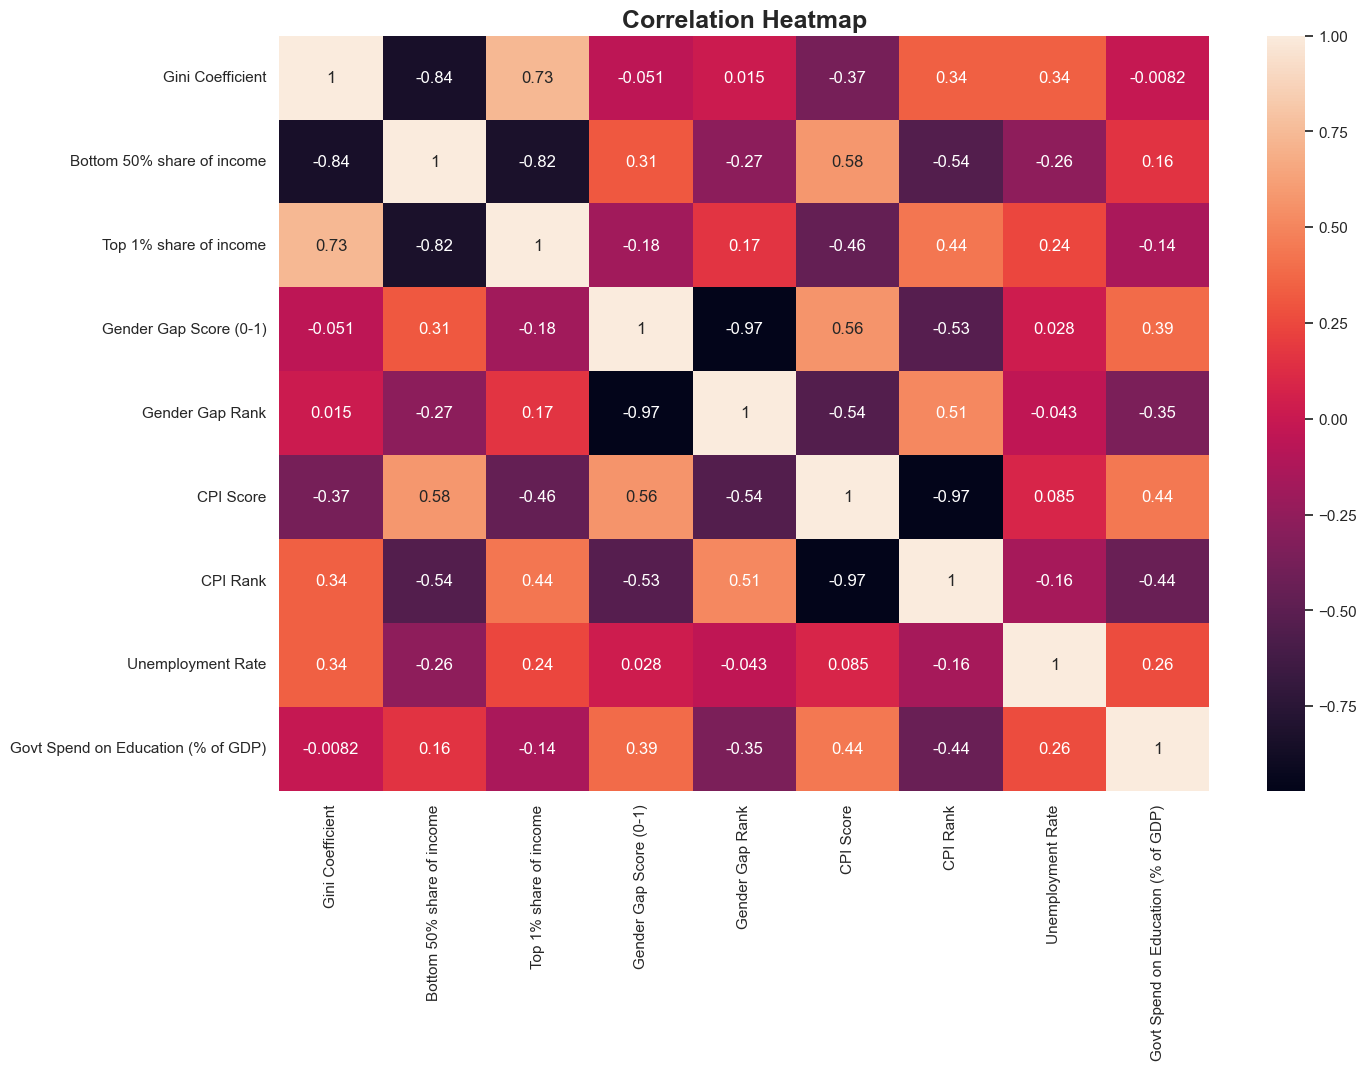

In [62]:
#Visualising the correlation heatmap of the variables
sns.heatmap(df_main_final.corr(),  
            annot=True)
plt.title('Correlation Heatmap',
          fontsize = 18, 
          fontweight = 'bold')

Text(0.5, 1.0, 'Gini Coefficient vs Top 1% share of income')

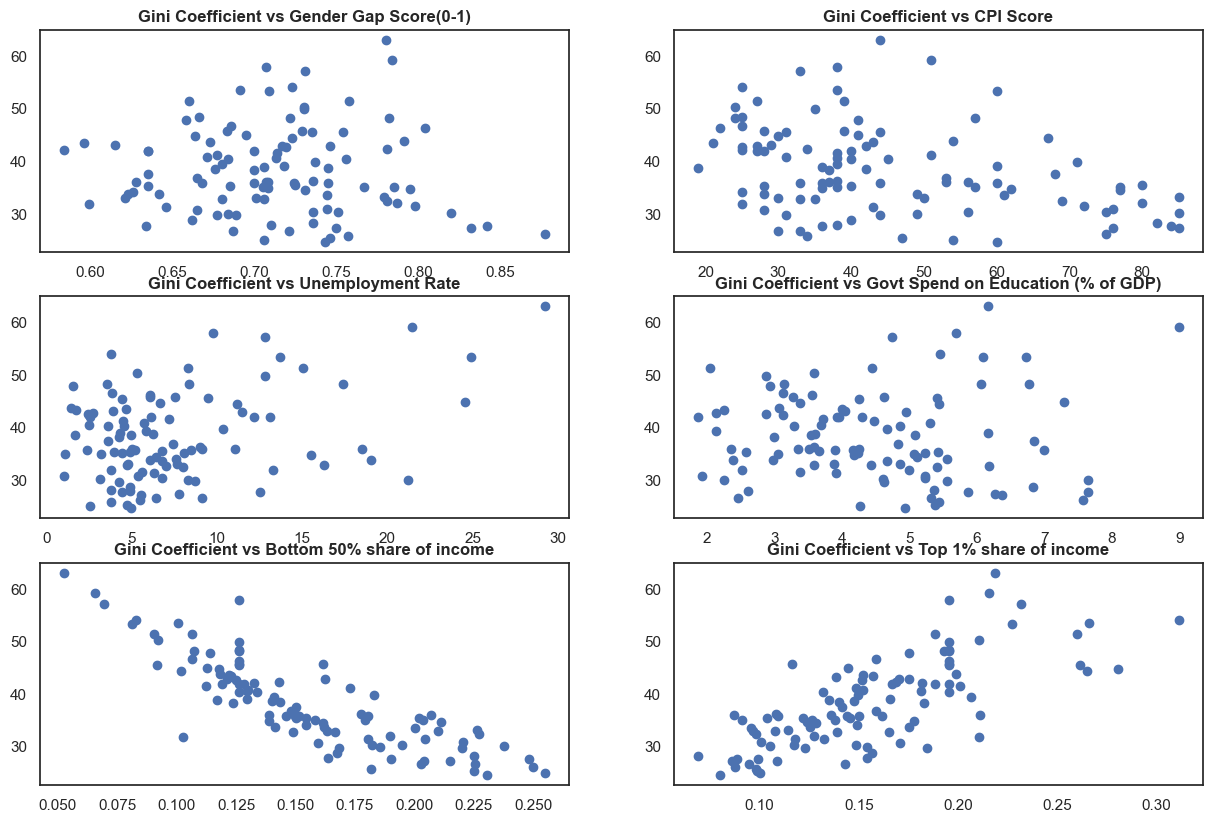

In [43]:
#Visuqlising Scatter plots of Gini Coefficien and other independent variables
fig, axs = plt.subplots(3,2)

axs[0,0].scatter('Gender Gap Score (0-1)', 
                 'Gini Coefficient', 
                 data = df_main_final)
axs[0,0].set_title('Gini Coefficient vs Gender Gap Score(0-1)', 
                   fontsize = 12, 
                   fontweight = 'bold')

axs[0,1].scatter('CPI Score', 
                 'Gini Coefficient', 
                 data = df_main_final)
axs[0,1].set_title('Gini Coefficient vs CPI Score',
                   fontsize = 12, 
                   fontweight = 'bold')

axs[1,0].scatter('Unemployment Rate', 
                 'Gini Coefficient', 
                 data = df_main_final)
axs[1,0].set_title('Gini Coefficient vs Unemployment Rate',
                   fontsize = 12, 
                   fontweight = 'bold')

axs[1,1].scatter('Govt Spend on Education (% of GDP)', 
                 'Gini Coefficient', 
                 data = df_main_final)
axs[1,1].set_title('Gini Coefficient vs Govt Spend on Education (% of GDP)',
                   fontsize = 12, 
                   fontweight = 'bold')

axs[2,0].scatter('Bottom 50% share of income', 
                 'Gini Coefficient', 
                 data = df_main_final)
axs[2,0].set_title('Gini Coefficient vs Bottom 50% share of income',
                   fontsize = 12, 
                   fontweight = 'bold')

axs[2,1].scatter('Top 1% share of income', 
                 'Gini Coefficient', 
                 data = df_main_final)
axs[2,1].set_title('Gini Coefficient vs Top 1% share of income',
                   fontsize = 12, 
                   fontweight = 'bold')

# Linear Regression with outliers included

In [44]:
#Creating the independent and dependent variables    
x = df_main_final.drop(labels=['Gini Coefficient', 'Gender Gap Rank', 'CPI Rank'], axis = 1)                    #There will be 4 independent variables

y = df_main_final['Gini Coefficient']

#Convert to numpy 
x_num = x.to_numpy()
y_num = y.to_numpy()

In [45]:
#Splitting the data into train set and test set
x_train, x_test, y_train, y_test = train_test_split(x_num, y_num, test_size= 0.20, random_state=40)

In [46]:
#Reshaping the arrays
y_train = y_train.reshape(len(y_train),1)
y_test = y_test.reshape(len(y_test),1)

In [47]:
#standardising the training data and test data
scaler = StandardScaler()
X_train = scaler.fit_transform(x_train)
X_test = scaler.fit_transform(x_test)
Y_train = scaler.fit_transform(y_train)
Y_test = scaler.fit_transform(y_test)

In [49]:
#Training the model
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [50]:
#Predicting the model using test set
y_pred = model.predict(X_test)

In [51]:
#Calculating R^2
r2_score(Y_test,y_pred)

0.7243557211107443

The coefficient of determination is a statistical measurement of the percentage of variance in the dependent variable explained by the independent variable(s)

In this case, the R^2 is 72.43% meaning that 72.43% of the variation in the Gini Coefficient is explained by the independent variables.


# Linear Regression without outliers 

In [52]:
#removing outliers
df_main_final_no_outliers = df_main_final[df_main_final['Unemployment Rate'] < 13] 
                                         
df_main_final_no_outliers

,Gini Coefficient,Bottom 50% share of income,Top 1% share of income,Gender Gap Score (0-1),Gender Gap Rank,CPI Score,CPI Rank,Unemployment Rate,Govt Spend on Education (% of GDP)
2,57.90,0.13,0.20,0.71,77,38,94,9.78,5.69
3,57.10,0.07,0.23,0.73,45,33,117,12.85,4.74
4,54.00,0.08,0.31,0.72,56,25,149,3.81,5.45
7,51.30,0.09,0.26,0.66,118,27,142,8.33,2.04
9,50.30,0.09,0.21,0.73,47,24,157,5.35,3.59
...,...,...,...,...,...,...,...,...,...
99,26.10,0.25,0.09,0.88,1,75,17,5.48,7.57
100,25.70,0.18,0.10,0.76,23,34,115,3.82,5.44
101,25.30,0.23,0.10,0.75,29,47,63,4.77,5.38
102,25.00,0.25,0.10,0.71,78,54,49,2.55,4.27


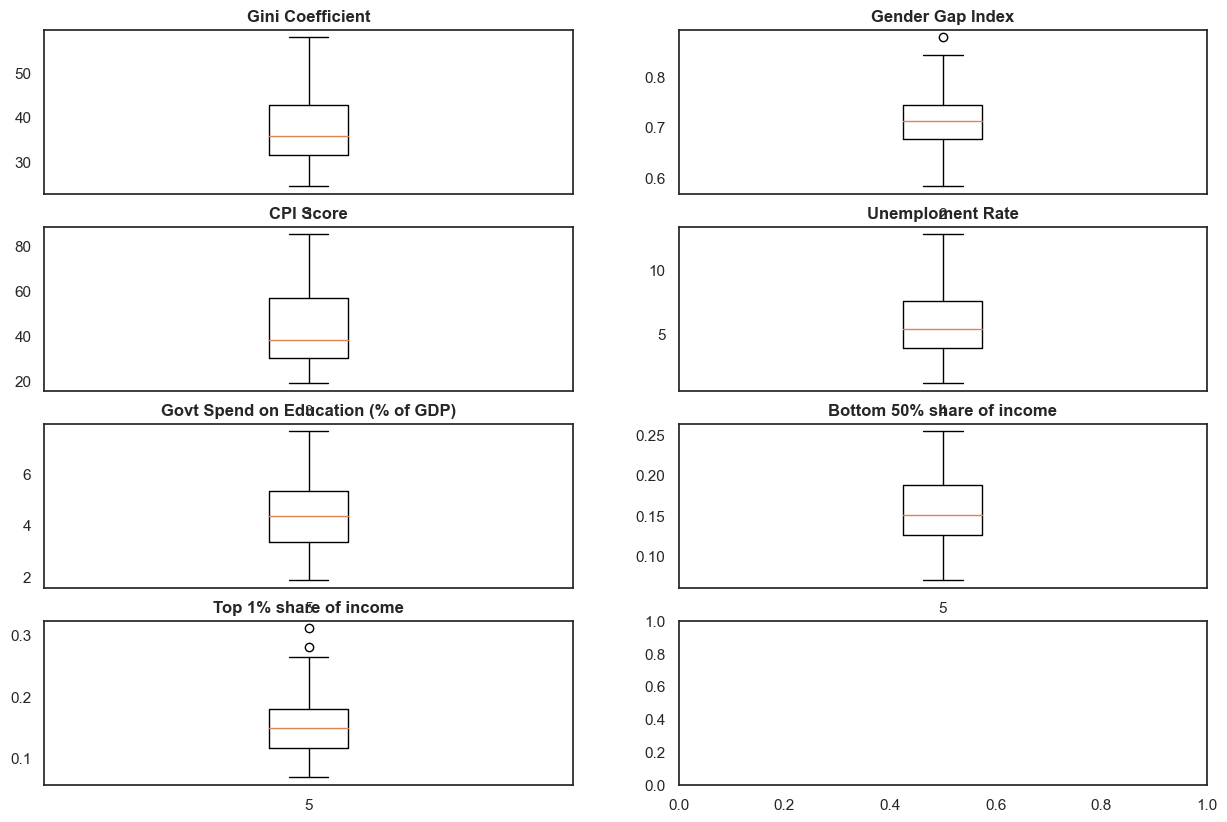

In [53]:
#Function
boxplot_chart('Gini Coefficient',
              'Gender Gap Score (0-1)',
              'CPI Score', 
              'Unemployment Rate', 
              'Govt Spend on Education (% of GDP)',
              'Bottom 50% share of income', 
              'Top 1% share of income',
             df_main_final_no_outliers)

In [54]:
#Creating the arrays of the independent and dependent variables
x_2 = df_main_final_no_outliers.drop(labels=['Gini Coefficient'], 
                                     axis = 1)                    #There will be 4 independent variables

y_2 = df_main_final_no_outliers['Gini Coefficient']

#Convert to numpy 
x_num_2 = x_2.to_numpy()
y_num_2 = y_2.to_numpy()

In [55]:
#Splitting training set and test set
x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(x_num_2, y_num_2, test_size= 0.20, random_state=40)

In [56]:
#Reshaping the y arrays
y_train_2 = y_train_2.reshape(len(y_train_2),1)
y_test_2 = y_test_2.reshape(len(y_test_2),1)

In [57]:
#Standising the training set and test set
scaler = StandardScaler()
X_train_2 = scaler.fit_transform(x_train_2)
X_test_2 = scaler.fit_transform(x_test_2)
Y_train_2 = scaler.fit_transform(y_train_2)
Y_test_2 = scaler.fit_transform(y_test_2)

In [58]:
#training the model
model_no_outliers = LinearRegression()
model_no_outliers.fit(X_train_2, Y_train_2)

LinearRegression()

In [59]:
#making predicions using test set
y_pred_no_outliers = model_no_outliers.predict(X_test_2)

In [60]:
#Calculating R^2
r2_score(Y_test_2, y_pred_no_outliers)

0.7631153263171777

By removing the outliers it is evident that the R^2 scored has improved to 76.31% from 72.43%.